In [83]:
import torch
import pandas as pd
import numpy as np
from torch import nn
import os
import sklearn
import matplotlib.pyplot as plt
import sys
import re

### For Colab

In [84]:
# # This mounts your Google Drive to the Colab VM.
# from google.colab import drive
# drive.mount('/content/drive')

# # TODO: Enter the foldername in your Drive where you have saved the unzipped
# # assignment folder, e.g. 'cs231n/assignments/assignment1/'
# FOLDERNAME = 'PyTorch Test Project/N_TXT'
# assert FOLDERNAME is not None, "[!] Enter the foldername."

# # Now that we've mounted your Drive, this ensures that
# # the Python interpreter of the Colab VM can load
# # python files from within it.
# import sys
# sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))

# # This downloads the CIFAR-10 dataset to your Drive
# # if it doesn't already exist.
# # %cd /content/drive/My\ Drive/$FOLDERNAME/cs231n/datasets/
# # !bash get_datasets.sh
# # %cd /content/drive/My\ Drive/$FOLDERNAME

In [85]:
# path = "/content/drive/MyDrive/PyTorch Test Project/N_TXT"

# os.chdir(path)

# fx_data = np.array([], dtype=np.float32)

# #gets data from file specified by file_path
# def get_contents(file_path):
#     global fx_data
#     skip_lines = 7

#     with open(file_path,'r') as file:

#         for skips in range(skip_lines):
#             next(file)

#         lines = file.readlines()[:-1]

#         for line in lines:
#             data = line.split()[-1]
#             fx_data = np.append(fx_data, np.float32(data))
#             #print(data)

In [86]:
path = "C:\\Users\Admin\\.vscode\\PyTorch\\Time Series Prediction\\N_TXT"

os.chdir(path)

fx_data = np.array([], dtype=np.float32)

#gets data from file specified by file_path
def get_contents(file_path):
    global fx_data
    skip_lines = 7

    with open(file_path,'r') as file:

        for skips in range(skip_lines):
            next(file)

        lines = file.readlines()[:-1]

        for line in lines:
            data = line.split()[-1]
            fx_data = np.append(fx_data, np.float32(data))
            #print(data)

In [87]:
#go through all files in directory and extract data from txt files
for file in os.listdir():
    if file.endswith(".txt"):
        file_path = f"{path}/{file}"
        
        # if (re.match("/Users/jm/VS Code/ML/Time Series Prediction/N_TXT/1Npie.txt", file_path) or
        #     re.match("/Users/jm/VS Code/ML/Time Series Prediction/N_TXT/2Npie.txt", file_path)):
        print(f"Currently working on: {file_path}")
        get_contents(file_path)

fx_data.dtype

Currently working on: C:\Users\Admin\.vscode\PyTorch\Time Series Prediction\N_TXT/10Npie.txt
Currently working on: C:\Users\Admin\.vscode\PyTorch\Time Series Prediction\N_TXT/11Npie.txt
Currently working on: C:\Users\Admin\.vscode\PyTorch\Time Series Prediction\N_TXT/1Npie.txt
Currently working on: C:\Users\Admin\.vscode\PyTorch\Time Series Prediction\N_TXT/2Npie.txt
Currently working on: C:\Users\Admin\.vscode\PyTorch\Time Series Prediction\N_TXT/3Npie.txt
Currently working on: C:\Users\Admin\.vscode\PyTorch\Time Series Prediction\N_TXT/4Npie.txt
Currently working on: C:\Users\Admin\.vscode\PyTorch\Time Series Prediction\N_TXT/5Npie.txt
Currently working on: C:\Users\Admin\.vscode\PyTorch\Time Series Prediction\N_TXT/6Npie.txt
Currently working on: C:\Users\Admin\.vscode\PyTorch\Time Series Prediction\N_TXT/7Npie.txt
Currently working on: C:\Users\Admin\.vscode\PyTorch\Time Series Prediction\N_TXT/8Npie.txt
Currently working on: C:\Users\Admin\.vscode\PyTorch\Time Series Prediction\N_

dtype('float32')

In [88]:
#create time "sample" for dataframe
time_data = np.array([], dtype=np.float32)

for x in range(len(fx_data)):
    time_data = np.append(time_data, np.float32(x))
    type(x)

time_data, time_data[0].dtype

(array([0.00000e+00, 1.00000e+00, 2.00000e+00, ..., 1.87857e+05,
        1.87858e+05, 1.87859e+05], dtype=float32),
 dtype('float32'))

In [89]:
#create time "sample" for dataframe
dataset = pd.DataFrame({"Time": time_data,
                        "FX Channel": fx_data})
dataset

,Time,FX Channel
0,0.0,17.0
1,1.0,17.0
2,2.0,17.0
3,3.0,17.0
4,4.0,17.0
...,...,...
187855,187855.0,1.3
187856,187856.0,1.3
187857,187857.0,1.3
187858,187858.0,1.3


([<matplotlib.lines.Line2D at 0x1d524b11bd0>], pandas.core.frame.DataFrame)

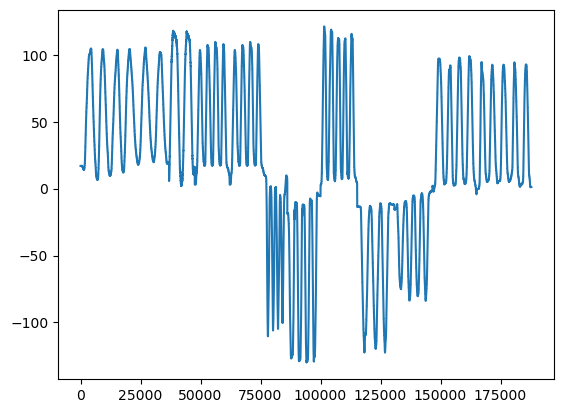

In [90]:
plt.plot(dataset["Time"], dataset["FX Channel"]), type(dataset)

In [91]:
X = dataset["Time"]
y = dataset["FX Channel"]

X

0              0.0
1              1.0
2              2.0
3              3.0
4              4.0
            ...   
187855    187855.0
187856    187856.0
187857    187857.0
187858    187858.0
187859    187859.0
Name: Time, Length: 187860, dtype: float32

In [92]:
#trying to split data loader now? not too sure if this is the best way
split_idx = int(0.8 * len(dataset))

temp_X_train = X[:split_idx]
temp_X_test = X[split_idx:]

temp_y_train = y[:split_idx]
temp_y_test = y[split_idx:]

temp_X_train.shape, temp_X_test.shape, temp_y_train.shape, temp_y_test.shape, len(X), temp_X_train

((150288,),
 (37572,),
 (150288,),
 (37572,),
 187860,
 0              0.0
 1              1.0
 2              2.0
 3              3.0
 4              4.0
             ...   
 150283    150283.0
 150284    150284.0
 150285    150285.0
 150286    150286.0
 150287    150287.0
 Name: Time, Length: 150288, dtype: float32)

In [93]:
def split_data(data, nsteps):
    data_list = list()

    for i in range(len(data)):
        end = i + nsteps
        if(end > len(data-1)):
            break

        extracted_data = data[i:end]

        data_list.append(extracted_data)

    return np.array(data_list)

In [94]:
nsteps = 100
X_train = split_data(temp_X_train, nsteps)
y_train = split_data(temp_y_train, nsteps)

X_train, type(X_train), len(X_train), 

(array([[0.00000e+00, 1.00000e+00, 2.00000e+00, ..., 9.70000e+01,
         9.80000e+01, 9.90000e+01],
        [1.00000e+00, 2.00000e+00, 3.00000e+00, ..., 9.80000e+01,
         9.90000e+01, 1.00000e+02],
        [2.00000e+00, 3.00000e+00, 4.00000e+00, ..., 9.90000e+01,
         1.00000e+02, 1.01000e+02],
        ...,
        [1.50186e+05, 1.50187e+05, 1.50188e+05, ..., 1.50283e+05,
         1.50284e+05, 1.50285e+05],
        [1.50187e+05, 1.50188e+05, 1.50189e+05, ..., 1.50284e+05,
         1.50285e+05, 1.50286e+05],
        [1.50188e+05, 1.50189e+05, 1.50190e+05, ..., 1.50285e+05,
         1.50286e+05, 1.50287e+05]], dtype=float32),
 numpy.ndarray,
 150189)

In [95]:
X = split_data(X, nsteps)
y = split_data(y, nsteps)

In [96]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [97]:
X_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train).float()
X_test = torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test).float()

X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([150208, 100]),
 torch.Size([37553, 100]),
 torch.Size([150208, 100]),
 torch.Size([37553, 100]))

In [98]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

X_train = scaler.fit_transform(X_train)

y_train = scaler.transform(y_train)

X_train.shape, y_train.shape

((150208, 100), (150208, 100))

In [99]:
X_train.max(), X_train.min(), y_train.max(), y_train.min()

(1.0, 0.0, 0.0006407149753234614, -0.0012249745684627632)

In [100]:
#set device
device = "cuda" if torch.cuda.is_available() else "cpu"
# device = "mps" if torch.backends.mps.is_available() else "cpu"

device

'cuda'

In [101]:
# X_train = torch.from_numpy(X_train).to(device).float()
# X_test = torch.from_numpy(X_test).to(device).float()
# y_train = torch.from_numpy(y_train).to(device).float()
# y_train = torch.from_numpy(y_train).to(device).float()

In [102]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((150208, 100),
 torch.Size([37553, 100]),
 (150208, 100),
 torch.Size([37553, 100]))

In [103]:
from torch.utils.data import Dataset

class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, i):
        return self.X[i], self.y[i]
    
train_dataset = TimeSeriesDataset(X_train, y_train)
test_dataset = TimeSeriesDataset(X_test, y_test)

In [104]:
from torch.utils.data import DataLoader

#setup batch size hyperparameter
BATCH_SIZE = 64

#turn datasets into iterables (batches)
train_loader = DataLoader(dataset=train_dataset, 
                              batch_size=BATCH_SIZE, 
                              shuffle=True,
                              drop_last=True)

test_loader = DataLoader(dataset=test_dataset, 
                              batch_size=BATCH_SIZE, 
                              shuffle=False,
                              drop_last=True)

#check out what we've created
print(f"Dataloaders: {train_loader, test_loader}")
print(f"Length of train_dataloader: {len(train_loader)} batches of {BATCH_SIZE}")
print(f"Length of train_dataloader: {len(test_loader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x000001D51D17C4D0>, <torch.utils.data.dataloader.DataLoader object at 0x000001D50BFE88D0>)
Length of train_dataloader: 2347 batches of 64
Length of train_dataloader: 586 batches of 64


In [105]:
#set manual seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)
device

'cuda'

In [106]:
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_stacked_layers):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_stacked_layers = num_stacked_layers

        self.lstm = nn.LSTM(input_size, hidden_size, num_stacked_layers, 
                            batch_first=True, dropout=0.05)
        
        self.fc = nn.Linear(hidden_size, 1, bias=True)

    def forward(self, x):
        batch_size = x.size(0)
        h0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)
        c0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)
        
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

model = LSTM(1, 8, 1)
model.to(device)
model

C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.05 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


LSTM(
  (lstm): LSTM(1, 8, batch_first=True, dropout=0.05)
  (fc): Linear(in_features=8, out_features=1, bias=True)
)

In [107]:
def train_one_epoch():
    model.train(True)
    print(f'Epoch: {epoch + 1}')
    running_loss = 0.0
    train_loss = 0.0
    
    for batch_index, batch in enumerate(train_loader):
        x_batch, y_batch = batch[0].to(device).unsqueeze(dim=2), batch[1].to(device)
        # print(f"{x_batch.shape}")
        output = model(x_batch.type(torch.float32))
        loss = loss_function(output, y_batch)
        running_loss += loss.item()
        train_loss += loss.item()
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch_index % 100 == 99:  # print every 100 batches
            avg_loss_across_batches = running_loss / 100
            print('Batch {0}, Loss: {1:.3f}'.format(batch_index+1,
                                                    avg_loss_across_batches))
            running_loss = 0.0

    global train_acc
    train_acc = np.append(train_acc, train_loss/len(train_loader))
    print()

In [108]:
def validate_one_epoch():
    model.eval()
    running_loss = 0.0
    test_loss = 0.0
    
    for batch_index, batch in enumerate(test_loader):
        x_batch, y_batch = batch[0].to(device).unsqueeze(dim=2), batch[1].to(device)
        
        with torch.inference_mode():
            output = model(x_batch.type(torch.float32))
            # print(f"{y_batch.shape}")
            loss = loss_function(output, y_batch)
            running_loss += loss.item()
            test_loss += loss.item()
                

    avg_loss_across_batches = running_loss / len(test_loader)
    global test_acc
    test_acc = np.append(test_acc, avg_loss_across_batches)

    test_loss = 0.0
    
    print('Val Loss: {0:.3f}'.format(avg_loss_across_batches))
    print('***************************************************')
    print()

In [109]:
learning_rate = 0.01
num_epochs = 100

loss_function = nn.L1Loss()
# optimizer = torch.optim.Adam(model.parameters(), 
#                              lr=learning_rate, 
#                              weight_decay=1e-5)

optimizer = torch.optim.Adam(model.parameters(), 
                             lr=learning_rate
                            )

train_acc = np.array([])
test_acc = np.array([])

for epoch in range(num_epochs):
    train_one_epoch()
    validate_one_epoch()

Epoch: 1


C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\torch\nn\modules\loss.py:101: UserWarning: Using a target size (torch.Size([64, 100])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


Batch 100, Loss: 0.004
Batch 200, Loss: 0.002
Batch 300, Loss: 0.004
Batch 400, Loss: 0.002
Batch 500, Loss: 0.003
Batch 600, Loss: 0.001
Batch 700, Loss: 0.001
Batch 800, Loss: 0.002
Batch 900, Loss: 0.002
Batch 1000, Loss: 0.002
Batch 1100, Loss: 0.002
Batch 1200, Loss: 0.001
Batch 1300, Loss: 0.001
Batch 1400, Loss: 0.001
Batch 1500, Loss: 0.001
Batch 1600, Loss: 0.002
Batch 1700, Loss: 0.002
Batch 1800, Loss: 0.002
Batch 1900, Loss: 0.001
Batch 2000, Loss: 0.001
Batch 2100, Loss: 0.001
Batch 2200, Loss: 0.001
Batch 2300, Loss: 0.001

Val Loss: 50.119
***************************************************

Epoch: 2
Batch 100, Loss: 0.001
Batch 200, Loss: 0.002
Batch 300, Loss: 0.001
Batch 400, Loss: 0.000
Batch 500, Loss: 0.001
Batch 600, Loss: 0.002
Batch 700, Loss: 0.001
Batch 800, Loss: 0.001
Batch 900, Loss: 0.001
Batch 1000, Loss: 0.001
Batch 1100, Loss: 0.001
Batch 1200, Loss: 0.001
Batch 1300, Loss: 0.001
Batch 1400, Loss: 0.001
Batch 1500, Loss: 0.001
Batch 1600, Loss: 0.001
Ba

KeyboardInterrupt: 

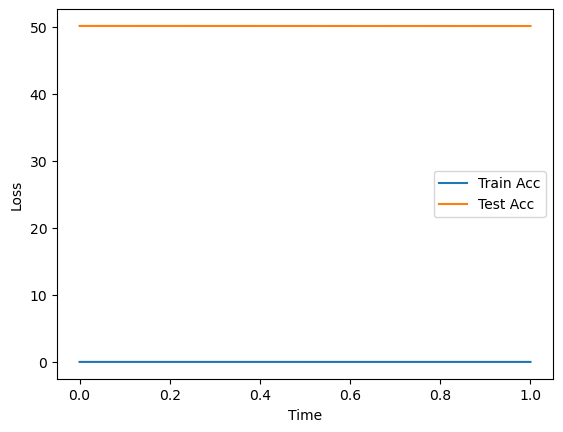

In [110]:
plt.plot(train_acc, label='Train Acc')
plt.plot(test_acc, label='Test Acc')
plt.xlabel('Time')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [111]:
len(X_train), X_train.shape

(150208, (150208, 100))

In [112]:
print(model)

LSTM(
  (lstm): LSTM(1, 8, batch_first=True, dropout=0.05)
  (fc): Linear(in_features=8, out_features=1, bias=True)
)


In [113]:
type(X_train)

numpy.ndarray

In [114]:
X_train = torch.from_numpy(X_train).float()
X_test = torch.from_numpy(X_test).float()



TypeError: expected np.ndarray (got Tensor)

In [120]:
X_train.max(), X_train.min()

(tensor(1.), tensor(0.))

In [119]:
print(y_train.shape), print(temp_y_train.shape), print(X_train.shape)

(150208, 100)
(150288,)
torch.Size([150208, 100])


(None, None, None)

In [127]:
temp_y_train = temp_y_train.to_numpy()
temp_y_train = scaler.fit_transform(temp_y_train.reshape(-1, 1))

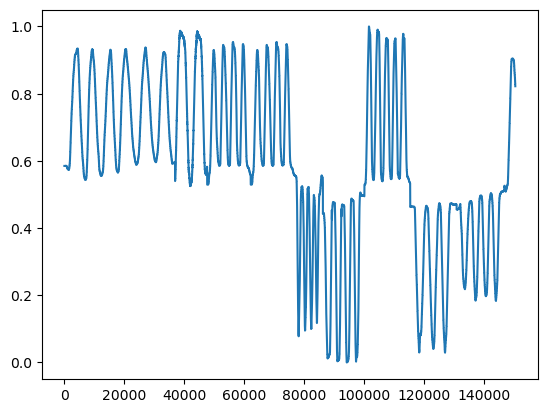

In [128]:
plt.plot(temp_y_train, label='Actual FX')

torch.Size([150208, 100])
(150208, 1)


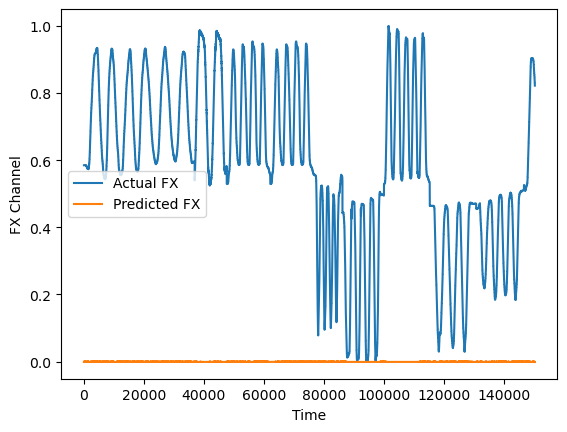

In [129]:
model.eval()
with torch.inference_mode():
    predicted = model((X_train.unsqueeze(dim=2)).to(device)).to("cpu").numpy()
    
print(X_train.shape)
print(predicted.shape)
plt.plot(temp_y_train, label='Actual FX')
plt.plot(predicted, label='Predicted FX')
plt.xlabel('Time')
plt.ylabel('FX Channel')
plt.legend()
plt.show()


In [121]:
predicted.max(), predicted.min()

(-0.00062295794, -0.0009292625)

In [ ]:
y_test.shape, X_test.shape, type(temp_y_test)

((37473, 100), torch.Size([37473, 100]), pandas.core.series.Series)

In [ ]:
temp_y_test = scaler.fit_transform(torch.from_numpy(temp_y_test.to_numpy()).reshape(-1,1))

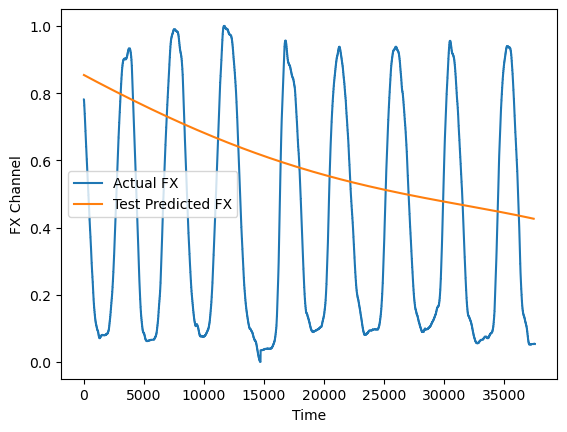

In [ ]:
model.eval()
with torch.inference_mode():
    test_pred = model((X_test.unsqueeze(dim=2)).to(device)).to("cpu").numpy()
    
plt.plot(temp_y_test, label='Actual FX')
plt.plot(test_pred, label='Test Predicted FX')
plt.xlabel('Time')
plt.ylabel('FX Channel')
plt.legend()
plt.show()

In [ ]:
test_pred.shape, test_pred.min(), test_pred.max()

((37473, 1), 0.42616108, 0.8538842)

In [ ]:
X_test.shape, X_test[0]

(torch.Size([37565, 8]), tensor([0., 0., 0., 0., 0., 0., 0., 0.]))

In [ ]:
temp = torch.arange(0, 1, 0.000016)
temp = temp.unsqueeze(dim=1)
temp.shape

torch.Size([62500, 1])

In [ ]:
# model.eval()
# with torch.inference_mode():
#     test_pred = model(X_test.to(device)).to('cpu').numpy()

# plt.plot(y_test, label='Actual FX')
# plt.plot(test_pred, label='Test Predicted FX')
# plt.xlabel('Time')
# plt.ylabel('FX Channel')
# plt.legend()
# plt.show()

RuntimeError: For unbatched 2-D input, hx and cx should also be 2-D but got (3-D, 3-D) tensors

In [ ]:
y_test[0], y_test[5800], y_train[0], y_train[23000]

(tensor([0.7812]), tensor([0.0658]), tensor([0.5850]), tensor([0.6347]))

In [ ]:
X_test.max(), X_test.min()

(tensor(1.), tensor(0.))